In [6]:
import sys
sys.path.append("..")

In [7]:
from library.simulator import BackTester, Runner
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# CSVデータを読み込む
df = pd.read_csv(
    "input_data/btf_periods900.csv",
)
# UNIXtimeをpandas.Timestampに変換する
df["CloseTime"] = pd.to_datetime(df["CloseTime"], unit="s")

rename_dict = {
    "CloseTime": "timestamp",
    "OpenPrice": "open",
    "HighPrice": "high",
    "LowPrice": "low",
    "ClosePrice": "close",
    "Volume": "volume",
}
df = df[list(rename_dict.keys())].rename(columns=rename_dict).set_index("timestamp")

config = {"slippage": 0.001, "minutes_to_expire": 60}
tester = BackTester(df, config)
runner = Runner(tester=tester)
runner.run()
snapshots = tester.snapshots
print(snapshots)

                               cash  position       valuation
timestamp                                                    
2023-01-26 21:45:00  1000000.000000  0.000000  1000000.000000
2023-01-26 22:00:00   625068.314981  0.124635   999625.471883
2023-01-26 22:15:00   999188.590260  0.000043   999317.752653
2023-01-26 22:30:00   338451.801156  0.219886   998657.641340
2023-01-26 22:45:00   596793.956753  0.133634   997455.744446
...                             ...       ...             ...
2023-04-01 01:15:00    54979.348410  0.026976   156927.394648
2023-04-01 01:30:00    55297.955342  0.026892   157018.577916
2023-04-01 01:45:00    39954.187296  0.030943   157037.374440
2023-04-01 02:00:00   106614.385808  0.013398   157570.257002
2023-04-01 02:15:00    59426.064337  0.025773   157605.960731

[6160 rows x 3 columns]


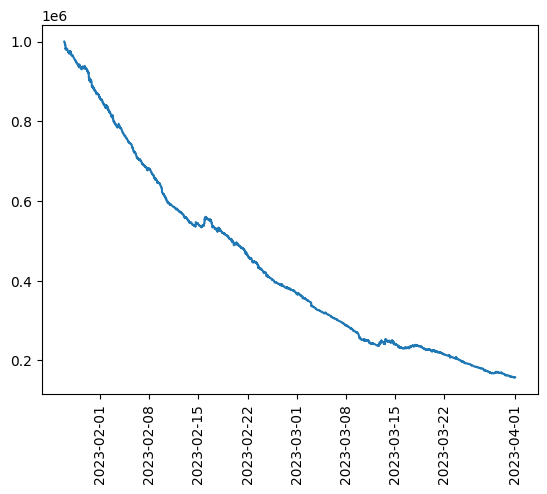

In [3]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)


ax.plot(snapshots.index, snapshots["valuation"])
plt.show()